In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [184]:
df = pd.read_csv('book_data.csv')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1200 non-null   int64  
 1   Title           1200 non-null   object 
 2   URL             1200 non-null   object 
 3   Authors         1200 non-null   object 
 4   Avg Ratings     1200 non-null   float64
 5   Rating          1200 non-null   object 
 6   Published_year  1200 non-null   int64  
 7   Pages           1200 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 75.1+ KB


In [186]:
df.shape

(1200, 8)

In [187]:
#Dropping Unnamed: 0 and URL columns as they are not necessary for visualisations and analysis
df = df.drop(["Unnamed: 0", "URL"], axis=1)

In [188]:
#Renaming Rating column to Ratings for improved readability
df.rename(columns={"Rating": "Ratings"}, inplace=True)

In [189]:
# Values contain non-numeric characters (namely commas) so these must be dealt with prior to conversion
print(df['Ratings'].unique())

['3,730,716' '3,781,804' '3,140,961' '2,409,554' '2,738,000' '1,847,530'
 '909,979' '923,793' '921,142' '859,338' '874,241' '629,105' '2,796,928'
 '2,681,223' '909,466' '757,980' '1,182,525' '712,480' '1,488,947'
 '1,712,396' '1,034,909' '1,358,088' '635,953' '903,828' '931,026'
 '1,951,759' '6,305,687' '334,081' '454,838' '710,830' '1,107,675'
 '590,485' '438,109' '514,230' '1,077,147' '770,108' '535,378' '429,766'
 '573,574' '657,986' '309,215' '284,548' '976,134' '596,650' '974,146'
 '945,437' '451,283' '392,955' '227,950' '376,705' '1,182,547' '909,980'
 '874,246' '770,124' '945,438']


In [190]:
# Remove non-numeric characters in the Ratings column and convert entries in to integers for analysis
df['Ratings'] = df['Ratings'].str.replace('[^\d.]', '', regex=True).astype(int)

In [191]:
# Some entries do not contain a valid page number but will be converted to NaN when column is made numeric
print(df['Pages'].unique())

['341' '366' '652' '835' '432' '419' '784' '448' '662' '465' '537' '377'
 '206' '358' '1177' '1060' '399' '503' '370' '624' '1125' '635' '400'
 '485' '498' '1007' '491' '703' '561' '248' 'Hardcover' '994' '578' '435'
 '1216' '752' '343' '195' '320' '388' '471' '572' '438' '228']


In [192]:
# Convert pages to numeric, will be converted to int after imputation 
df['Pages'] = pd.to_numeric(df['Pages'], errors='coerce', downcast='integer')


In [193]:
# Check to see how many null values after data type conversion
df.isnull().sum()

Title              0
Authors            0
Avg Ratings        0
Ratings            0
Published_year     0
Pages             24
dtype: int64

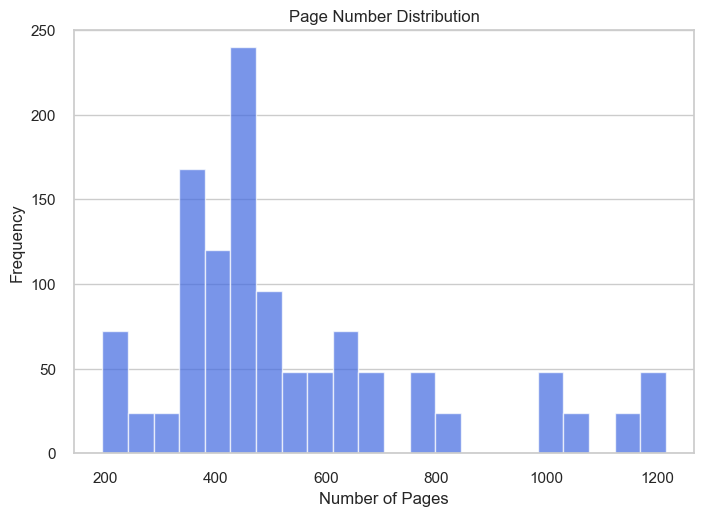

In [194]:
# Histogram visualisation of page distribution to determine the preferable imputation method

# new varaible with dropped null values used for plotting
data = df['Pages'].dropna()  

# Create the histogram 
n, bins, patches = plt.hist(data, bins='auto', alpha=0.7,
                           color='royalblue')

# Create labels and customise grid
plt.grid(axis='x')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Page Number Distribution')
maxfreq = n.max()

# Set Y axis limit based on largest bin frequency
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
# Show the plot
plt.show()


Number of outliers: 120


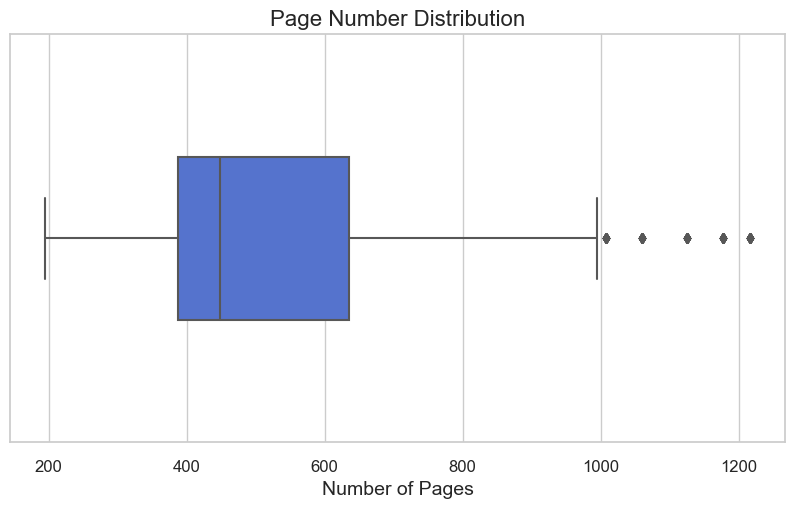

In [195]:
# Create boxplot to aid in impuation decision making 

plt.figure(figsize=(10, 6))

# Create a box plot for the "Pages" data with enhanced styling
sns.boxplot(x=data, width=0.4, color='royalblue', fliersize=5, showfliers=True)

# Add labels and title
plt.xlabel('Number of Pages', fontsize=14)
plt.title('Page Number Distribution', fontsize=16)

# Customize tick labels
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(bottom=0.2)


# Calculate and count outliers using the IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data < lower_bound) | (data > upper_bound)
num_outliers = outliers.sum()
print(f'Number of outliers: {num_outliers}')

# Show the plot
plt.show()


In [196]:
#Due to containing 120 outliers the median value was chosen as imputation as mean would skew the data

#Calculate meadian of Pages and print value to make sure imputation is conducted correctly
median_pages = df['Pages'].median()
print(f"Before imputation:{(df['Pages'] == median_pages).sum()}")

# Impute missing values with the median
df['Pages'].fillna(median_pages, inplace=True)
print(f"After imputation:{(df['Pages'] == median_pages).sum()}")


Before imputation:24
After imputation:48


In [197]:
# Dataset is now ready for visualisation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           1200 non-null   object 
 1   Authors         1200 non-null   object 
 2   Avg Ratings     1200 non-null   float64
 3   Ratings         1200 non-null   int64  
 4   Published_year  1200 non-null   int64  
 5   Pages           1200 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 56.4+ KB


In [199]:
# Export final version of dataset for visualisation
df.to_csv('book_data_final.csv')